<a href="https://colab.research.google.com/github/prp20/tensorflow_learning/blob/main/notebooks/nlp_practise_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow_datasets as tfds

tf.__version__

'2.9.2'

In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-46b275ab-e0bd-dc54-d6a1-344236775951)


In [3]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d kaushiksuresh147/the-social-dilemma-tweets

100% 2.56M/2.56M [00:00<00:00, 4.85MB/s]
100% 2.56M/2.56M [00:00<00:00, 4.15MB/s]


In [7]:
! unzip /content/the-social-dilemma-tweets.zip

Archive:  /content/the-social-dilemma-tweets.zip
  inflating: TheSocialDilemma.csv    


In [8]:
dataset = pd.read_csv("/content/TheSocialDilemma.csv")

In [9]:
dataset

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Sentiment
0,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:55:33,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
1,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:53:17,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
2,Varun Tyagi,"Goa, India",Indian | Tech Solution Artist & Hospitality Ex...,2009-09-06 10:36:01,257,204,475,False,2020-09-16 20:51:57,Go watch “The Social Dilemma” on Netflix!\n\nI...,NaN,Twitter for iPhone,False,Positive
3,Casey Conway,"Sydney, New South Wales",Head of Diversity & Inclusion @RugbyAU | It's ...,2012-12-28 21:45:06,11782,1033,12219,True,2020-09-16 20:51:46,I watched #TheSocialDilemma last night. I’m sc...,['TheSocialDilemma'],Twitter for iPhone,False,Negative
4,Charlotte Paul,Darlington,Instagram Charlottejyates,2012-05-28 20:43:08,278,387,5850,False,2020-09-16 20:51:11,The problem of me being on my phone most the t...,['TheSocialDilemma'],Twitter for iPhone,False,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20063,scp.,NaN,"“Through love, all is possible.” - SJM - See m...",2013-02-19 00:55:12,431,193,32958,False,2020-10-09 00:25:53,#TheSocialDilemma yalll.... this shit... we kn...,['TheSocialDilemma'],Twitter for iPhone,False,Negative
20064,Dono6971,United States,"Father, Husband, and a Dude|| Love Notre Dame ...",2010-01-06 04:08:41,172,96,50159,False,2020-10-09 00:24:45,Peeps:\n\nFind 90 minutes this weekend and wat...,NaN,Twitter for iPhone,False,Positive
20065,Remi Shores,NaN,Genderfluid / They/Them/Theirs / Queer Christi...,2012-05-16 23:49:13,387,652,7885,False,2020-10-09 00:11:42,"So you watched #thesocialdilemma, or have been...",['thesocialdilemma'],Twitter Web App,False,Negative
20066,Scott the Great and Terrible,NaN,"I can't recall the taste of food, nor the soun...",2020-03-16 18:20:31,103,84,2976,False,2020-10-09 00:10:16,Good social media advice:\n\nChoose the thing ...,['TheSocialDilemma'],Twitter Web App,False,Positive


In [10]:
text_data = dataset['text'].to_list()
labels = dataset['Sentiment'].to_numpy().reshape(-1, 1)

In [11]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(text_data, labels, test_size=0.2, shuffle=True, random_state=42)
len(train_data), len(test_data), len(train_labels), len(test_labels)

(16054, 4014, 16054, 4014)

In [12]:
one_hot_encoder = OneHotEncoder(sparse=False)
label_encoder = LabelEncoder()

In [13]:
train_labels_one_hot = one_hot_encoder.fit_transform(train_labels)
test_labels_one_hot = one_hot_encoder.transform(test_labels)

train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.transform(test_labels)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
NUM_CLASSES = len(label_encoder.classes_)
NUM_CLASSES

3

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])
model_0.fit(train_data, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [16]:
model_0_score = model_0.score(test_data, test_labels)

In [17]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {
      "accuracy": model_accuracy,
      "precision":model_precision,
      "recall": model_recall,
      "f1_score": model_f1_score
  }
  return model_results

def return_callbacks(model_name):
  callbacks_list = []
  callbacks_list.append(tf.keras.callbacks.ModelCheckpoint("saved_models/"+model_name, monitor='val_loss', save_best_only='True', verbose=1))
  callbacks_list.append(tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights='True'))
  return callbacks_list

In [18]:
model_0_preds = model_0.predict(test_data)
model_0_results = calculate_results(test_labels, model_0_preds)
model_results_dataset = {}
model_results_dataset['model_0'] = model_0_results
model_0_results

{'accuracy': 61.85849526656702,
 'precision': 0.7451298809731886,
 'recall': 0.6185849526656702,
 'f1_score': 0.5600003587792417}

In [19]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels_one_hot))

# Take the TensorSliceDataset's and turn them into prefetched batches
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 3), dtype=tf.float64, name=None))>

In [20]:
from tensorflow.keras.layers import TextVectorization
output_seq_length = round(sum([len(i.split()) for i in train_data])/len(train_data))
tv_layer = TextVectorization(max_tokens=10000, standardize="lower_and_strip_punctuation", split="whitespace", output_mode="int", output_sequence_length=output_seq_length, pad_to_max_tokens=True)
tv_layer.adapt(train_data)

In [21]:
from tensorflow.keras import layers

embedding_layer = layers.Embedding(input_dim=10000, output_dim=128, input_length=output_seq_length)

In [22]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = tv_layer(inputs)
x = embedding_layer(x)
x = layers.GlobalAveragePooling1D()(x)
output = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model_1 = tf.keras.Model(inputs, output, name="nlp_model_1")
model_1.summary()

Model: "nlp_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 16)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 16, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 1,280,387
Trainable params: 1,280,387
Non

In [23]:
model_1.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
history_1 = model_1.fit(train_dataset, epochs=20, validation_data=test_dataset, callbacks=return_callbacks(model_1.name))

Epoch 1/20
501/502 [============================>.] - ETA: 0s - loss: 0.8072 - accuracy: 0.6551
Epoch 1: val_loss improved from inf to 0.64943, saving model to saved_models/nlp_model_1
502/502 [==============================] - 6s 7ms/step - loss: 0.8069 - accuracy: 0.6552 - val_loss: 0.6494 - val_accuracy: 0.7304
Epoch 2/20
499/502 [============================>.] - ETA: 0s - loss: 0.4971 - accuracy: 0.8224
Epoch 2: val_loss improved from 0.64943 to 0.48374, saving model to saved_models/nlp_model_1
502/502 [==============================] - 3s 7ms/step - loss: 0.4968 - accuracy: 0.8224 - val_loss: 0.4837 - val_accuracy: 0.8109
Epoch 3/20
500/502 [============================>.] - ETA: 0s - loss: 0.3305 - accuracy: 0.8948
Epoch 3: val_loss improved from 0.48374 to 0.41159, saving model to saved_models/nlp_model_1
502/502 [==============================] - 3s 6ms/step - loss: 0.3303 - accuracy: 0.8947 - val_loss: 0.4116 - val_accuracy: 0.8490
Epoch 4/20
501/502 [========================

In [24]:
model_1.evaluate(test_dataset)
model_1_loaded = tf.keras.models.load_model("saved_models/nlp_model_1")
model_1_preds = model_1_loaded.predict(test_dataset)
model_1_results = calculate_results(test_labels, tf.argmax(model_1_preds, axis=1))
model_results_dataset['model_1'] = model_1_results
model_1_results

126/126 [==============================] - 0s 2ms/step


{'accuracy': 86.87095166915795,
 'precision': 0.8695089684609235,
 'recall': 0.8687095166915795,
 'f1_score': 0.8663084047885153}

In [25]:
tf.keras.backend.clear_session()

In [26]:
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=10000, output_dim=128, embeddings_initializer="uniform", input_length=output_seq_length, name="embedding_2")

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = tv_layer(inputs)
x = model_2_embedding(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model_2 = tf.keras.Model(inputs, output, name="nlp_model_2")
model_2.summary()

Model: "nlp_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 16)               0         
 torization)                                                     
                                                                 
 embedding_2 (Embedding)     (None, 16, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 3)                 

In [27]:
model_2.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
history_2 = model_2.fit(train_dataset, epochs=20, validation_data=test_dataset,callbacks=return_callbacks(model_2.name))

Epoch 1/20
494/502 [============================>.] - ETA: 0s - loss: 0.6619 - accuracy: 0.7287
Epoch 1: val_loss improved from inf to 0.43324, saving model to saved_models/nlp_model_2
502/502 [==============================] - 4s 7ms/step - loss: 0.6585 - accuracy: 0.7303 - val_loss: 0.4332 - val_accuracy: 0.8371
Epoch 2/20
497/502 [============================>.] - ETA: 0s - loss: 0.2864 - accuracy: 0.9034
Epoch 2: val_loss improved from 0.43324 to 0.37351, saving model to saved_models/nlp_model_2
502/502 [==============================] - 3s 6ms/step - loss: 0.2861 - accuracy: 0.9035 - val_loss: 0.3735 - val_accuracy: 0.8737
Epoch 3/20
502/502 [==============================] - ETA: 0s - loss: 0.1778 - accuracy: 0.9454
Epoch 3: val_loss did not improve from 0.37351
502/502 [==============================] - 3s 6ms/step - loss: 0.1778 - accuracy: 0.9454 - val_loss: 0.3982 - val_accuracy: 0.8690
Epoch 4/20
491/502 [============================>.] - ETA: 0s - loss: 0.1285 - accuracy: 0

In [28]:
model_2.evaluate(test_dataset)
model_2_loaded = tf.keras.models.load_model("saved_models/nlp_model_2")
model_2_preds = model_2_loaded.predict(test_dataset)
model_2_results = calculate_results(test_labels, tf.argmax(model_2_preds, axis=1))
model_results_dataset['model_2'] = model_2_results
model_2_results

126/126 [==============================] - 1s 4ms/step


{'accuracy': 87.36920777279522,
 'precision': 0.8730049120890256,
 'recall': 0.8736920777279522,
 'f1_score': 0.8721520826446647}

In [29]:
tf.keras.backend.clear_session()

In [30]:
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=10000, output_dim=128, embeddings_initializer="uniform", input_length=output_seq_length, name="embedding_2")

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = tv_layer(inputs)
x = model_3_embedding(x)
x = layers.LSTM(64)(x)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model_3 = tf.keras.Model(inputs, output, name="nlp_model_3")
model_3.summary()

Model: "nlp_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 16)               0         
 torization)                                                     
                                                                 
 embedding_2 (Embedding)     (None, 16, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                       

In [31]:
model_3.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
history_3 = model_3.fit(train_dataset, epochs=20, validation_data=test_dataset,callbacks=return_callbacks(model_3.name))

Epoch 1/20
495/502 [============================>.] - ETA: 0s - loss: 0.5652 - accuracy: 0.7750
Epoch 1: val_loss improved from inf to 0.34702, saving model to saved_models/nlp_model_3


502/502 [==============================] - 14s 19ms/step - loss: 0.5626 - accuracy: 0.7761 - val_loss: 0.3470 - val_accuracy: 0.8807
Epoch 2/20
496/502 [============================>.] - ETA: 0s - loss: 0.2444 - accuracy: 0.9202
Epoch 2: val_loss did not improve from 0.34702
502/502 [==============================] - 4s 8ms/step - loss: 0.2443 - accuracy: 0.9202 - val_loss: 0.3561 - val_accuracy: 0.8819
Epoch 3/20
500/502 [============================>.] - ETA: 0s - loss: 0.1682 - accuracy: 0.9480
Epoch 3: val_loss did not improve from 0.34702
502/502 [==============================] - 4s 8ms/step - loss: 0.1683 - accuracy: 0.9479 - val_loss: 0.3726 - val_accuracy: 0.8874
Epoch 4/20
501/502 [============================>.] - ETA: 0s - loss: 0.1285 - accuracy: 0.9618
Epoch 4: val_loss did not improve from 0.34702
502/502 [==============================] - 3s 6ms/step - loss: 0.1284 - accuracy: 0.9618 - val_loss: 0.3884 - val_accuracy: 0.8899
Epoch 5/20
496/502 [=========================

In [32]:
model_3.evaluate(test_dataset)
model_3_loaded = tf.keras.models.load_model("saved_models/nlp_model_3")
model_3_preds = model_3_loaded.predict(test_dataset)
model_3_results = calculate_results(test_labels, tf.argmax(model_3_preds, axis=1))
model_results_dataset['model_3'] = model_3_results
model_3_results

126/126 [==============================] - 1s 3ms/step


{'accuracy': 88.06676631788739,
 'precision': 0.8807399972773913,
 'recall': 0.8806676631788739,
 'f1_score': 0.8796374634146443}

In [33]:
tf.keras.backend.clear_session()

In [34]:
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=10000, output_dim=128, embeddings_initializer="uniform", input_length=output_seq_length, name="embedding_4")

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = tv_layer(inputs)
x = model_4_embedding(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.GRU(64)(x)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model_4 = tf.keras.Model(inputs, output, name="nlp_model_4")
model_4.summary()

Model: "nlp_model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 16)               0         
 torization)                                                     
                                                                 
 embedding_4 (Embedding)     (None, 16, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 16, 64)            49408     
                                                                 
 gru (GRU)                   (None, 64)                24960     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                       

In [35]:
model_4.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
history_4 = model_4.fit(train_dataset, epochs=20, validation_data=test_dataset,callbacks=return_callbacks(model_4.name))

Epoch 1/20
498/502 [============================>.] - ETA: 0s - loss: 0.5608 - accuracy: 0.7787
Epoch 1: val_loss improved from inf to 0.35924, saving model to saved_models/nlp_model_4


502/502 [==============================] - 17s 28ms/step - loss: 0.5593 - accuracy: 0.7791 - val_loss: 0.3592 - val_accuracy: 0.8739
Epoch 2/20
502/502 [==============================] - ETA: 0s - loss: 0.2465 - accuracy: 0.9200
Epoch 2: val_loss improved from 0.35924 to 0.33643, saving model to saved_models/nlp_model_4


502/502 [==============================] - 12s 24ms/step - loss: 0.2465 - accuracy: 0.9200 - val_loss: 0.3364 - val_accuracy: 0.8901
Epoch 3/20
498/502 [============================>.] - ETA: 0s - loss: 0.1675 - accuracy: 0.9486
Epoch 3: val_loss did not improve from 0.33643
502/502 [==============================] - 5s 9ms/step - loss: 0.1674 - accuracy: 0.9486 - val_loss: 0.3815 - val_accuracy: 0.8792
Epoch 4/20
501/502 [============================>.] - ETA: 0s - loss: 0.1265 - accuracy: 0.9625
Epoch 4: val_loss did not improve from 0.33643
502/502 [==============================] - 5s 10ms/step - loss: 0.1264 - accuracy: 0.9625 - val_loss: 0.4033 - val_accuracy: 0.8844
Epoch 5/20
497/502 [============================>.] - ETA: 0s - loss: 0.0996 - accuracy: 0.9709
Epoch 5: val_loss did not improve from 0.33643
502/502 [==============================] - 4s 8ms/step - loss: 0.0994 - accuracy: 0.9708 - val_loss: 0.4486 - val_accuracy: 0.8752
Epoch 6/20
499/502 [========================

In [36]:
model_4.evaluate(test_dataset)
model_4_loaded = tf.keras.models.load_model("saved_models/nlp_model_4")
model_4_preds = model_4_loaded.predict(test_dataset)
model_4_results = calculate_results(test_labels, tf.argmax(model_4_preds, axis=1))
model_results_dataset['model_4'] = model_4_results

126/126 [==============================] - 1s 3ms/step


In [37]:
tf.keras.backend.clear_session()

In [38]:
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=10000, output_dim=128, embeddings_initializer="uniform", input_length=output_seq_length, name="embedding_5")

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = tv_layer(inputs)
x = model_5_embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model_5 = tf.keras.Model(inputs, output, name="nlp_model_5")
model_5.summary()

Model: "nlp_model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 16)               0         
 torization)                                                     
                                                                 
 embedding_5 (Embedding)     (None, 16, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 16, 128)          98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                                       

In [39]:
model_5.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
history_5 = model_5.fit(train_dataset, epochs=20, validation_data=test_dataset,callbacks=return_callbacks(model_5.name))

Epoch 1/20
500/502 [============================>.] - ETA: 0s - loss: 0.5530 - accuracy: 0.7856
Epoch 1: val_loss improved from inf to 0.34491, saving model to saved_models/nlp_model_5


502/502 [==============================] - 34s 58ms/step - loss: 0.5524 - accuracy: 0.7858 - val_loss: 0.3449 - val_accuracy: 0.8809
Epoch 2/20
500/502 [============================>.] - ETA: 0s - loss: 0.2438 - accuracy: 0.9226
Epoch 2: val_loss improved from 0.34491 to 0.33457, saving model to saved_models/nlp_model_5


502/502 [==============================] - 28s 56ms/step - loss: 0.2438 - accuracy: 0.9224 - val_loss: 0.3346 - val_accuracy: 0.8884
Epoch 3/20
498/502 [============================>.] - ETA: 0s - loss: 0.1635 - accuracy: 0.9499
Epoch 3: val_loss did not improve from 0.33457
502/502 [==============================] - 8s 15ms/step - loss: 0.1636 - accuracy: 0.9499 - val_loss: 0.3758 - val_accuracy: 0.8837
Epoch 4/20
499/502 [============================>.] - ETA: 0s - loss: 0.1206 - accuracy: 0.9633
Epoch 4: val_loss did not improve from 0.33457
502/502 [==============================] - 6s 13ms/step - loss: 0.1205 - accuracy: 0.9632 - val_loss: 0.4276 - val_accuracy: 0.8794
Epoch 5/20
498/502 [============================>.] - ETA: 0s - loss: 0.0897 - accuracy: 0.9725
Epoch 5: val_loss did not improve from 0.33457
502/502 [==============================] - 7s 13ms/step - loss: 0.0895 - accuracy: 0.9725 - val_loss: 0.4590 - val_accuracy: 0.8934
Epoch 6/20
502/502 [======================

In [40]:
model_5.evaluate(test_dataset)
model_5_loaded = tf.keras.models.load_model("saved_models/nlp_model_5")
model_5_preds = model_5_loaded.predict(test_dataset)
model_5_results = calculate_results(test_labels, tf.argmax(model_5_preds, axis=1))
model_results_dataset['model_5'] = model_5_results

126/126 [==============================] - 2s 5ms/step


In [41]:
tf.keras.backend.clear_session()

model_6_embedding = layers.Embedding(input_dim=10000, output_dim=128, embeddings_initializer="uniform", input_length=output_seq_length, name="embedding_6")

# Create 1D convolutional model to process sequences
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = tv_layer(inputs) # vectorize text inputs
token_embeddings = model_6_embedding(text_vectors) # create embedding
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) # condense the output of our feature vector
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)
model_6 = tf.keras.Model(inputs, outputs, name="nlp_model_6")

# Compile
model_6.compile(loss="categorical_crossentropy", # if your labels are integer form (not one hot) use sparse_categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_6 = model_6.fit(train_dataset, epochs=20, validation_data=test_dataset,callbacks=return_callbacks(model_6.name))

Epoch 1/20
502/502 [==============================] - ETA: 0s - loss: 0.5829 - accuracy: 0.7678
Epoch 1: val_loss improved from inf to 0.37510, saving model to saved_models/nlp_model_6


502/502 [==============================] - 7s 7ms/step - loss: 0.5829 - accuracy: 0.7678 - val_loss: 0.3751 - val_accuracy: 0.8700
Epoch 2/20
496/502 [============================>.] - ETA: 0s - loss: 0.2641 - accuracy: 0.9173
Epoch 2: val_loss improved from 0.37510 to 0.35710, saving model to saved_models/nlp_model_6


502/502 [==============================] - 4s 9ms/step - loss: 0.2643 - accuracy: 0.9172 - val_loss: 0.3571 - val_accuracy: 0.8886
Epoch 3/20
502/502 [==============================] - ETA: 0s - loss: 0.1737 - accuracy: 0.9478
Epoch 3: val_loss did not improve from 0.35710
502/502 [==============================] - 2s 5ms/step - loss: 0.1737 - accuracy: 0.9478 - val_loss: 0.3942 - val_accuracy: 0.8802
Epoch 4/20
500/502 [============================>.] - ETA: 0s - loss: 0.1263 - accuracy: 0.9653
Epoch 4: val_loss did not improve from 0.35710
502/502 [==============================] - 3s 6ms/step - loss: 0.1263 - accuracy: 0.9653 - val_loss: 0.4454 - val_accuracy: 0.8744
Epoch 5/20
496/502 [============================>.] - ETA: 0s - loss: 0.0942 - accuracy: 0.9736
Epoch 5: val_loss did not improve from 0.35710
502/502 [==============================] - 3s 6ms/step - loss: 0.0941 - accuracy: 0.9736 - val_loss: 0.5125 - val_accuracy: 0.8702
Epoch 6/20
501/502 [===========================

In [42]:
model_6.evaluate(test_dataset)
model_6_loaded = tf.keras.models.load_model("saved_models/nlp_model_6")
model_6_preds = model_6_loaded.predict(test_dataset)
model_6_results = calculate_results(test_labels, tf.argmax(model_6_preds, axis=1))
model_results_dataset['model_6'] = model_6_results

126/126 [==============================] - 0s 2ms/step


In [43]:
tf.keras.backend.clear_session()

import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

model_7 = tf.keras.Sequential([
  layers.Input(shape=[], dtype=tf.string),
  tf_hub_embedding_layer, # take in sentences and then encode them into an embedding
  layers.Dense(128, activation="relu"),
  layers.Dense(NUM_CLASSES, activation="softmax")
], name="nlp_model_7")

model_7.summary()

model_7.compile(loss="categorical_crossentropy", # if your labels are integer form (not one hot) use sparse_categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_7 = model_7.fit(train_dataset, epochs=20, validation_data=test_dataset,callbacks=return_callbacks(model_7.name))

Model: "nlp_model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 256,863,875
Trainable params: 66,051
Non-trainable params: 256,797,824
_________________________________________________________________
Epoch 1/20
497/502 [============================>.] - ETA: 0s - loss: 0.7654 - accuracy: 0.6641
Epoch 1: val_loss improved from inf to 0.70139, saving model to saved_models/nlp_model_7
502/502 [==============================] - 20s 34

In [44]:
model_7.evaluate(test_dataset)
model_7_loaded = tf.keras.models.load_model("saved_models/nlp_model_7")
model_7_preds = model_7_loaded.predict(test_dataset)
model_7_results = calculate_results(test_labels, tf.argmax(model_7_preds, axis=1))
model_results_dataset['model_7'] = model_7_results

126/126 [==============================] - 1s 9ms/step


In [45]:
tf.keras.backend.clear_session()

In [46]:
# Make function to split sentences into characters
def split_chars(text):
  return " ".join(list(text))

# Split sequence-level data splits into character-level data splits
train_chars = [split_chars(sentence) for sentence in train_data]
test_chars = [split_chars(sentence) for sentence in test_data]
print(train_chars[0])
char_lens = [len(sentence) for sentence in train_data]
mean_char_len = np.mean(char_lens)
mean_char_len
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

# T h e S o c i a l D i l e m m a   
 
 W e l l ,   e v e r y o n e   s h o u l d   w a t c h   t h i s .   S u c h   a   c r i t i c a l   s t u f f . 
 
 -   N e v e r   a c c e p t   a   v i d e o   r e c o m m e n d e d   t o …   h t t p s : / / t . c o / 0 W b e n T B A d D


140

In [47]:
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
# Create char-level token vectorizer instance
NUM_CHAR_TOKENS = len(alphabet) + 2 # num characters in alphabet + space + OOV token
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,  
                                    output_sequence_length=output_seq_char_len,
                                    standardize="lower_and_strip_punctuation",
                                    name="char_vectorizer")

# Adapt character vectorizer to training characters
char_vectorizer.adapt(train_chars)
     

In [49]:
# Create char embedding layer
char_embed = layers.Embedding(input_dim=NUM_CHAR_TOKENS, # number of different characters
                              output_dim=25, # embedding dimension of each character (same as Figure 1 in https://arxiv.org/pdf/1612.05251.pdf)
                              mask_zero=False, # don't use masks (this messes up model_5 if set to True)
                              name="char_embed")

In [50]:
# Make Conv1D on chars only
inputs = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)
model_8 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="nlp_model_8")

# Compile model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [51]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 3), dtype=tf.float64, name=None))>

In [52]:
history_8 = model_8.fit(train_char_dataset, epochs=20, validation_data=val_char_dataset,callbacks=return_callbacks(model_8.name))

Epoch 1/20
502/502 [==============================] - ETA: 0s - loss: 0.9432 - accuracy: 0.5533
Epoch 1: val_loss improved from inf to 0.87799, saving model to saved_models/nlp_model_8


502/502 [==============================] - 5s 8ms/step - loss: 0.9432 - accuracy: 0.5533 - val_loss: 0.8780 - val_accuracy: 0.5989
Epoch 2/20
497/502 [============================>.] - ETA: 0s - loss: 0.8311 - accuracy: 0.6207
Epoch 2: val_loss improved from 0.87799 to 0.80839, saving model to saved_models/nlp_model_8


502/502 [==============================] - 3s 7ms/step - loss: 0.8297 - accuracy: 0.6218 - val_loss: 0.8084 - val_accuracy: 0.6520
Epoch 3/20
500/502 [============================>.] - ETA: 0s - loss: 0.7674 - accuracy: 0.6622
Epoch 3: val_loss improved from 0.80839 to 0.77047, saving model to saved_models/nlp_model_8


502/502 [==============================] - 3s 7ms/step - loss: 0.7666 - accuracy: 0.6628 - val_loss: 0.7705 - val_accuracy: 0.6672
Epoch 4/20
501/502 [============================>.] - ETA: 0s - loss: 0.7235 - accuracy: 0.6879
Epoch 4: val_loss improved from 0.77047 to 0.74731, saving model to saved_models/nlp_model_8


502/502 [==============================] - 3s 7ms/step - loss: 0.7231 - accuracy: 0.6881 - val_loss: 0.7473 - val_accuracy: 0.6796
Epoch 5/20
499/502 [============================>.] - ETA: 0s - loss: 0.6894 - accuracy: 0.7047
Epoch 5: val_loss improved from 0.74731 to 0.73179, saving model to saved_models/nlp_model_8


502/502 [==============================] - 3s 7ms/step - loss: 0.6887 - accuracy: 0.7052 - val_loss: 0.7318 - val_accuracy: 0.6921
Epoch 6/20
500/502 [============================>.] - ETA: 0s - loss: 0.6608 - accuracy: 0.7203
Epoch 6: val_loss improved from 0.73179 to 0.72181, saving model to saved_models/nlp_model_8


502/502 [==============================] - 4s 7ms/step - loss: 0.6601 - accuracy: 0.7208 - val_loss: 0.7218 - val_accuracy: 0.6958
Epoch 7/20
493/502 [============================>.] - ETA: 0s - loss: 0.6364 - accuracy: 0.7302
Epoch 7: val_loss improved from 0.72181 to 0.71634, saving model to saved_models/nlp_model_8


502/502 [==============================] - 3s 7ms/step - loss: 0.6362 - accuracy: 0.7309 - val_loss: 0.7163 - val_accuracy: 0.6973
Epoch 8/20
496/502 [============================>.] - ETA: 0s - loss: 0.6160 - accuracy: 0.7427
Epoch 8: val_loss improved from 0.71634 to 0.71307, saving model to saved_models/nlp_model_8


502/502 [==============================] - 3s 7ms/step - loss: 0.6152 - accuracy: 0.7435 - val_loss: 0.7131 - val_accuracy: 0.6963
Epoch 9/20
495/502 [============================>.] - ETA: 0s - loss: 0.5972 - accuracy: 0.7535
Epoch 9: val_loss improved from 0.71307 to 0.70911, saving model to saved_models/nlp_model_8


502/502 [==============================] - 3s 7ms/step - loss: 0.5968 - accuracy: 0.7542 - val_loss: 0.7091 - val_accuracy: 0.6998
Epoch 10/20
495/502 [============================>.] - ETA: 0s - loss: 0.5802 - accuracy: 0.7626
Epoch 10: val_loss improved from 0.70911 to 0.70764, saving model to saved_models/nlp_model_8


502/502 [==============================] - 3s 7ms/step - loss: 0.5799 - accuracy: 0.7632 - val_loss: 0.7076 - val_accuracy: 0.7025
Epoch 11/20
496/502 [============================>.] - ETA: 0s - loss: 0.5651 - accuracy: 0.7713
Epoch 11: val_loss improved from 0.70764 to 0.70651, saving model to saved_models/nlp_model_8


502/502 [==============================] - 3s 7ms/step - loss: 0.5645 - accuracy: 0.7720 - val_loss: 0.7065 - val_accuracy: 0.7010
Epoch 12/20
496/502 [============================>.] - ETA: 0s - loss: 0.5511 - accuracy: 0.7775
Epoch 12: val_loss improved from 0.70651 to 0.70650, saving model to saved_models/nlp_model_8


502/502 [==============================] - 3s 7ms/step - loss: 0.5505 - accuracy: 0.7781 - val_loss: 0.7065 - val_accuracy: 0.7038
Epoch 13/20
493/502 [============================>.] - ETA: 0s - loss: 0.5377 - accuracy: 0.7835
Epoch 13: val_loss did not improve from 0.70650
502/502 [==============================] - 3s 5ms/step - loss: 0.5380 - accuracy: 0.7839 - val_loss: 0.7068 - val_accuracy: 0.7060
Epoch 14/20
499/502 [============================>.] - ETA: 0s - loss: 0.5265 - accuracy: 0.7911
Epoch 14: val_loss did not improve from 0.70650
502/502 [==============================] - 3s 5ms/step - loss: 0.5262 - accuracy: 0.7913 - val_loss: 0.7098 - val_accuracy: 0.7035
Epoch 15/20
496/502 [============================>.] - ETA: 0s - loss: 0.5161 - accuracy: 0.7946
Epoch 15: val_loss did not improve from 0.70650
502/502 [==============================] - 3s 5ms/step - loss: 0.5157 - accuracy: 0.7950 - val_loss: 0.7127 - val_accuracy: 0.7033
Epoch 16/20
499/502 [====================

In [53]:
model_8.evaluate(test_dataset)
model_8_loaded = tf.keras.models.load_model("saved_models/nlp_model_8")
model_8_preds = model_8_loaded.predict(test_dataset)
model_8_results = calculate_results(test_labels, tf.argmax(model_8_preds, axis=1))
model_results_dataset['model_8'] = model_8_results

126/126 [==============================] - 0s 2ms/step


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
tf.keras.backend.clear_session()

In [55]:
# 1. Setup token inputs/model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)

# 2. Setup char inputs/model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings) # bi-LSTM shown in Figure 1 of https://arxiv.org/pdf/1612.05251.pdf
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Concatenate token and char inputs (create hybrid token embedding)
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output, 
                                                                  char_model.output])

# 4. Create output layers - addition of dropout discussed in 4.2 of https://arxiv.org/pdf/1612.05251.pdf
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout) # slightly different to Figure 1 due to different shapes of token/char embedding layers
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(4, activation="softmax")(final_dropout)

# 5. Construct model with char and token inputs
model_9 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="nlp_model_9")

In [56]:
# Compile token char model
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), # section 4.2 of https://arxiv.org/pdf/1612.05251.pdf mentions using SGD but we'll stick with Adam
                metrics=["accuracy"])

In [57]:
# Combine chars and tokens into a dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_data, train_chars)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels

# Prefetch and batch train data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 

# Repeat same steps validation data
val_char_token_data = tf.data.Dataset.from_tensor_slices((test_data, test_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [58]:
history_9 = model_9.fit(train_char_token_dataset, epochs=20, validation_data=val_char_token_dataset, callbacks=return_callbacks(model_9.name))

Epoch 1/20


ValueError: ignored

In [59]:
tf.keras.backend.clear_session()

In [63]:
model_10_embedding = tf.keras.layers.Embedding(input_dim=10000, output_dim=128, embeddings_initializer="uniform", input_length=output_seq_length, name="embedding_6")

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = tv_layer(inputs)
x = model_10_embedding(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
preds = layers.Dense(NUM_CLASSES, activation="softmax")(x)
model_10 = tf.keras.Model(inputs, preds, name="nlp_model_10")
model_10.summary()

ValueError: ignored

In [61]:
model_10.compile(loss="categorical_crossentropy", # if your labels are integer form (not one hot) use sparse_categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_10 = model_10.fit(train_dataset, epochs=20, validation_data=test_dataset,callbacks=return_callbacks(model_10.name))

NameError: ignored

In [ ]:
model_10.evaluate(test_dataset)
model_10_loaded = tf.keras.models.load_model("saved_models/nlp_model_10")
model_10_preds = model_10_loaded.predict(test_dataset)
model_10_results = calculate_results(test_labels, tf.argmax(model_10_preds, axis=1))
model_results_dataset['model_10'] = model_10_results

In [64]:
dataframe = pd.DataFrame(model_results_dataset).T
dataframe['accuracy'] = dataframe['accuracy'].div(100)
dataframe

,accuracy,precision,recall,f1_score
model_0,0.618585,0.745130,0.618585,0.560000
model_1,0.868710,0.869509,0.868710,0.866308
model_2,0.873692,0.873005,0.873692,0.872152
model_3,0.880668,0.880740,0.880668,0.879637
model_4,0.890135,0.889577,0.890135,0.889752
model_5,0.888391,0.888014,0.888391,0.888115
model_6,0.888640,0.888147,0.888640,0.887519
model_7,0.728201,0.724687,0.728201,0.722025
model_8,0.335077,0.112277,0.335077,0.168195


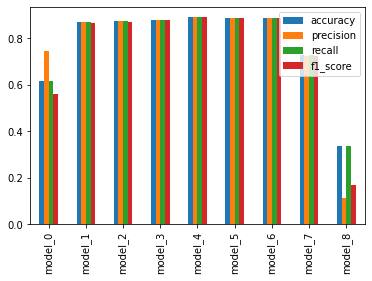

In [65]:
dataframe.plot.bar()